In [19]:
from keras.layers import Input
from keras.layers import Dense
from keras.models import Model

from keras.datasets import mnist

import matplotlib.pyplot as plt

In [5]:
input = Input(shape=(784,))
#encoded = Dense(10 ,  activation= "relu")
#encoded(input)
encoded = Dense(10 ,  activation= "relu")(input) 

decoded = Dense(784, activation = 'sigmoid' ) ( encoded)

autoencoder = Model( input , decoded)
encoder = Model(input , encoded)

encoded_input= Input(shape = (10,))
decoded_layer = autoencoder.layers[-1](encoded_input)
decoder = Model(encoded_input,decoded_layer)


In [13]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [14]:
(x_train,_) , (x_test,_) = mnist.load_data()

In [15]:
x_train.max()

255

In [16]:
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape(-1,784)
x_test =x_test.reshape(-1,784)

In [17]:
 h =autoencoder.fit(x_train , x_train ,  validation_data=(x_test , x_test) , epochs = 50)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.0105 - loss: 0.2092 - val_accuracy: 0.0090 - val_loss: 0.1679
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0115 - loss: 0.1653 - val_accuracy: 0.0106 - val_loss: 0.1606
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0115 - loss: 0.1601 - val_accuracy: 0.0099 - val_loss: 0.1570
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0102 - loss: 0.1574 - val_accuracy: 0.0104 - val_loss: 0.1552
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0101 - loss: 0.1560 - val_accuracy: 0.0097 - val_loss: 0.1540
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0102 - loss: 0.1553 - val_accuracy: 0.0095 - val_loss: 0.1536
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0097 - loss: 0.1548 - val_accuracy: 0.0093 - val_loss: 0.1532
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0094 - loss: 0.1545 - 

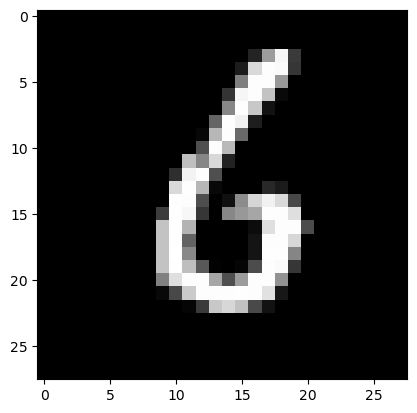

In [20]:
img = x_test[50] 
plt.imshow(img.reshape(28,28) , 'gray')

In [22]:
encoded_img = encoder.predict(img.reshape(1,-1))
encoded_img

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


array([[6.250534 , 4.7917595, 6.884422 , 6.5547953, 6.648058 , 6.969926 ,
        5.8062344, 0.       , 7.215687 , 5.282267 ]], dtype=float32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


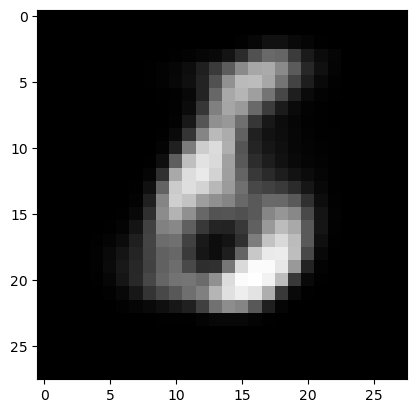

In [24]:
decoded_img = decoder.predict(encoded_img)
plt.imshow(decoded_img.reshape(28,28), 'gray')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


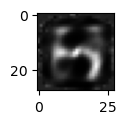

In [32]:
import numpy as np
plt.figure(figsize=(1,1))
data = np.random.normal(0.5,0.25 , (1,10))
decoded_img = decoder.predict(data)
plt.imshow(decoded_img.reshape(28,28), 'gray')

In [26]:
decoder.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 784)                 │           8,624 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,624 (33.69 KB)

 Trainable params: 8,624 (33.69 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
print(decoder.input_shape)


(None, 10)
